# Exploratory Weather DataSet

The objective of this dataset is to carry out an analysis of the different meteorological agents referring to the city of Chicago.

## Load the libraries, we´re going to use 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
pd.options.display.max_columns = None

## Read the data

### Humidity

In [2]:
humidity = pd.read_csv('Data/historical-hourly-weather-data/humidity.csv')
humidity.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
16514,2014-08-20 14:00:00,87.0,70.0,97.0,79.0,88.0,86.0,81.0,96.0,54.0,47.0,82.0,67.0,87.0,70.0,87.0,85.0,89.0,76.0,81.0,81.0,89.0,73.0,93.0,94.0,86.0,97.0,68.0,64.0,60.0,85.0,38.0,48.0,21.0,36.0,36.0,49.0
17359,2014-09-24 19:00:00,87.0,92.0,79.0,93.0,43.0,56.0,14.0,25.0,54.0,41.0,45.0,43.0,59.0,75.0,77.0,73.0,75.0,58.0,62.0,50.0,74.0,98.0,87.0,88.0,56.0,75.0,54.0,53.0,56.0,79.0,64.0,74.0,29.0,100.0,97.0,82.0
39882,2017-04-20 06:00:00,76.0,87.0,77.0,93.0,77.0,72.0,32.0,18.0,15.0,43.0,83.0,78.0,94.0,69.0,86.0,64.0,81.0,88.0,77.0,88.0,81.0,78.0,93.0,69.0,87.0,71.0,76.0,76.0,100.0,93.0,46.0,59.0,43.0,68.0,68.0,59.0
1893,2012-12-19 09:00:00,86.0,86.0,66.0,74.0,87.0,87.0,81.0,81.0,80.0,64.0,NaN,57.0,66.0,65.0,92.0,80.0,74.0,65.0,93.0,93.0,75.0,93.0,93.0,94.0,87.0,87.0,93.0,93.0,86.0,93.0,34.0,45.0,30.0,51.0,51.0,39.0
27780,2015-12-03 00:00:00,87.0,87.0,65.0,81.0,25.0,10.0,19.0,13.0,16.0,19.0,45.0,53.0,71.0,49.0,80.0,65.0,100.0,49.0,86.0,100.0,93.0,94.0,87.0,88.0,87.0,100.0,100.0,94.0,100.0,100.0,90.0,82.0,100.0,100.0,100.0,82.0


### Pressure

In [3]:
pressure = pd.read_csv('Data/historical-hourly-weather-data/pressure.csv')
pressure.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
2841,2013-01-27 21:00:00,NaN,1016.0,1017.0,1014.0,1012.0,1014.0,1011.0,1013.0,1015.0,1012.0,1018.0,1021.0,1019.0,1021.0,1023.0,1027.0,1028.0,1026.0,1027.0,1023.0,1027.0,1022.0,1023.0,1022.0,1023.0,1025.0,1023.0,1021.0,1023.0,1018.0,964.0,995.0,1012.0,1013.0,1012.0,1011.0
35649,2016-10-25 21:00:00,1008.0,994.0,1022.0,1017.0,964.0,984.0,921.0,975.0,848.0,818.0,1006.0,1013.0,1029.0,996.0,1004.0,1019.0,1020.0,1011.0,1011.0,1003.0,1019.0,1035.0,1010.0,1031.0,998.0,1022.0,1029.0,1033.0,1028.0,1031.0,983.0,1004.0,967.0,1022.0,1022.0,997.0
35718,2016-10-28 18:00:00,1009.0,992.0,1017.0,1016.0,962.0,981.0,916.0,973.0,849.0,818.0,1010.0,1015.0,1031.0,996.0,986.0,1018.0,1011.0,1012.0,1008.0,1004.0,1014.0,1035.0,1009.0,1029.0,997.0,1018.0,1027.0,1029.0,1026.0,1020.0,990.0,1011.0,973.0,1029.0,1029.0,1004.0
40549,2017-05-18 01:00:00,1021.0,1022.0,1011.0,1022.0,1012.0,1013.0,1006.0,1004.0,1006.0,1003.0,1007.0,1006.0,1009.0,999.0,995.0,1007.0,1002.0,1011.0,1008.0,1017.0,1008.0,1019.0,1019.0,1016.0,1014.0,1008.0,1015.0,1013.0,1006.0,1019.0,982.0,1010.0,965.0,1021.0,1021.0,1010.0
5490,2013-05-18 06:00:00,NaN,1016.0,1016.0,1015.0,NaN,1015.0,1005.0,NaN,1016.0,1014.0,1011.0,1009.0,1011.0,1011.0,1014.0,1015.0,NaN,1015.0,1016.0,1018.0,1019.0,1019.0,1017.0,1018.0,1017.0,1017.0,1013.0,1011.0,1014.0,1009.0,970.0,1017.0,1016.0,1019.0,1019.0,993.0


### Temperature

In [4]:
temperature = pd.read_csv('Data/historical-hourly-weather-data/temperature.csv')
temperature.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
34601,2016-09-12 05:00:00,286.60,287.3200,287.8600,287.6600,291.4600,291.9500,301.9600,304.0200,288.2800,293.3500,297.2600,295.2200,298.0500,290.6100,291.2300,289.5900,288.8100,290.2400,288.5000,294.9500,286.1400,298.4900,295.4100,301.0100,286.6500,286.4900,290.5500,291.73,284.71,287.6400,297.318,299.67,300.660,298.120,294.150,299.7800
3043,2013-02-05 07:00:00,278.29,279.0300,280.7400,279.8000,285.4700,284.7900,282.4800,286.6400,278.8800,276.1500,286.8800,284.2000,286.1200,277.0300,258.1300,272.5200,265.2800,269.9000,262.1300,278.1500,262.9200,281.2900,271.7600,290.7100,260.9700,267.0700,268.5200,269.98,262.98,267.8400,291.370,288.83,287.200,291.910,291.910,292.0800
17043,2014-09-11 15:00:00,286.21,288.2675,290.0675,288.6675,296.5675,297.1175,293.7675,298.5925,290.0175,284.7425,301.7925,302.2675,302.3175,287.2925,280.8925,290.6925,287.5175,298.8925,289.7675,298.9925,288.8925,300.8425,298.5675,300.9925,295.8425,291.3425,297.8175,295.86,292.83,291.9175,302.365,302.52,310.170,304.150,302.150,299.2175
12171,2014-02-20 15:00:00,277.65,280.1500,282.9600,279.8600,284.8900,282.3400,281.6700,289.0600,273.1200,267.3600,292.9100,293.1500,295.8200,283.5500,274.0000,286.8300,275.7500,292.1500,279.1700,290.1600,274.4100,295.1500,289.8600,299.1500,275.5400,273.3800,278.4500,278.53,271.73,277.4200,292.754,292.70,301.150,292.754,294.054,295.1500
40856,2017-05-30 20:00:00,285.46,286.5700,293.2900,286.3800,293.1600,291.2300,307.7100,307.7000,297.1500,295.9700,302.6800,304.0800,303.8400,299.0000,286.6200,299.0000,294.1400,301.1200,296.5600,296.3500,295.4400,304.6600,299.1400,305.1500,297.0100,291.3000,289.2300,287.85,288.46,289.1100,291.096,296.15,298.196,295.871,295.871,296.1500


### Weather description

In [5]:
weather_description = pd.read_csv('Data/historical-hourly-weather-data/weather_description.csv')
weather_description.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
21206,2015-03-04 02:00:00,sky is clear,sky is clear,few clouds,sky is clear,few clouds,sky is clear,scattered clouds,moderate rain,light rain,light snow,light rain,light rain,light rain,light rain,sky is clear,light rain,sky is clear,moderate rain,light rain,moderate rain,sky is clear,sky is clear,light rain,sky is clear,moderate rain,light snow,light rain,overcast clouds,overcast clouds,snow,light rain,light rain,sky is clear,light rain,light rain,light rain
913,2012-11-08 13:00:00,sky is clear,mist,mist,overcast clouds,mist,fog,sky is clear,sky is clear,sky is clear,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,overcast clouds,light rain,mist,sky is clear,drizzle,mist,sky is clear,scattered clouds,haze,scattered clouds,sky is clear,overcast clouds,overcast clouds,overcast clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear
22898,2015-05-13 14:00:00,light rain,moderate rain,broken clouds,moderate rain,few clouds,sky is clear,sky is clear,sky is clear,moderate rain,broken clouds,heavy intensity rain,moderate rain,light rain,sky is clear,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,few clouds,light rain,scattered clouds,broken clouds,scattered clouds,broken clouds,light rain,sky is clear,sky is clear,light rain,few clouds,light rain,scattered clouds,sky is clear,scattered clouds,overcast clouds,few clouds
43885,2017-10-04 01:00:00,sky is clear,sky is clear,sky is clear,sky is clear,broken clouds,few clouds,sky is clear,sky is clear,few clouds,broken clouds,few clouds,moderate rain,light rain,sky is clear,sky is clear,broken clouds,mist,sky is clear,sky is clear,sky is clear,scattered clouds,light rain,few clouds,mist,sky is clear,sky is clear,scattered clouds,sky is clear,few clouds,sky is clear,sky is clear,scattered clouds,sky is clear,sky is clear,sky is clear,scattered clouds
24815,2015-08-01 11:00:00,sky is clear,sky is clear,broken clouds,sky is clear,haze,fog,sky is clear,few clouds,overcast clouds,sky is clear,haze,sky is clear,few clouds,scattered clouds,sky is clear,sky is clear,few clouds,sky is clear,sky is clear,few clouds,sky is clear,mist,overcast clouds,overcast clouds,sky is clear,sky is clear,sky is clear,mist,thunderstorm with light rain,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear


### Wind direction

In [6]:
wind_direction = pd.read_csv('Data/historical-hourly-weather-data/wind_direction.csv')
wind_direction.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
34703,2016-09-16 11:00:00,61.0,186.0,280.0,10.0,61.0,30.0,329.0,350.0,10.0,218.0,23.0,180.0,87.0,330.0,230.0,117.0,150.0,82.0,90.0,94.0,68.0,70.0,0.0,344.0,50.0,10.0,61.0,140.0,340.0,219.0,295.0,270.0,350.0,150.0,150.0,270.0
16334,2014-08-13 02:00:00,280.0,271.0,253.0,237.0,203.0,274.0,175.0,220.0,166.0,105.0,29.0,22.0,356.0,235.0,312.0,337.0,322.0,332.0,323.0,303.0,304.0,231.0,246.0,162.0,218.0,216.0,126.0,130.0,150.0,150.0,249.0,130.0,338.0,180.0,130.0,299.0
300,2012-10-14 00:00:00,80.0,180.0,270.0,190.0,270.0,310.0,350.0,230.0,240.0,0.0,130.0,160.0,120.0,110.0,150.0,0.0,90.0,0.0,90.0,350.0,0.0,100.0,0.0,0.0,350.0,350.0,360.0,330.0,300.0,330.0,315.0,90.0,360.0,16.0,16.0,10.0
20082,2015-01-16 06:00:00,121.0,195.0,184.0,180.0,194.0,73.0,192.0,34.0,312.0,227.0,141.0,231.0,333.0,243.0,166.0,256.0,288.0,251.0,255.0,314.0,270.0,185.0,271.0,337.0,243.0,278.0,242.0,252.0,202.0,256.0,141.0,205.0,337.0,205.0,177.0,202.0
24262,2015-07-09 10:00:00,190.0,290.0,0.0,198.0,240.0,232.0,10.0,30.0,300.0,40.0,160.0,190.0,170.0,107.0,168.0,280.0,360.0,210.0,220.0,248.0,70.0,200.0,236.0,60.0,170.0,70.0,320.0,6.0,140.0,43.0,288.0,270.0,40.0,226.0,226.0,290.0


### Wind Speed

In [7]:
wind_speed = pd.read_csv('Data/historical-hourly-weather-data/wind_speed.csv')
wind_speed.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
25182,2015-08-16 18:00:00,3.0,1.0,4.0,3.0,2.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,3.0,2.0,7.0,3.0,5.0,3.0,2.0,6.0,2.0,2.0,6.0,4.0,5.0,5.0,2.0
35716,2016-10-28 16:00:00,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,6.0,4.0,7.0,1.0,3.0,1.0,1.0,2.0,1.0,7.0,1.0,3.0,5.0,6.0,5.0,6.0,1.0,2.0,1.0,4.0,4.0,0.0
45171,2017-11-26 15:00:00,NaN,8.0,NaN,7.0,0.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,3.0,4.0,3.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,3.0,NaN,3.0,3.0,7.0,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
32131,2016-06-01 07:00:00,2.0,3.0,5.0,0.0,2.0,2.0,8.0,5.0,10.0,4.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,6.0,1.0,2.0,4.0,2.0,2.0,2.0,7.0,2.0,2.0,1.0
10189,2013-11-30 01:00:00,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,4.0,1.0,4.0,3.0,1.0,0.0,3.0,4.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0


## Study the dimensions of the dataset

In [8]:
humidity.shape

(45253, 37)

In [9]:
pressure.shape

(45253, 37)

In [10]:
temperature.shape

(45253, 37)

In [11]:
weather_description.shape

(45253, 37)

In [12]:
wind_direction.shape

(45253, 37)

In [13]:
wind_speed.shape

(45253, 37)

## Get only the data of Chicago

In [14]:
humidity_chicago = humidity[['datetime','Chicago']]
humidity_chicago.rename(columns={"datetime": "datetime", "Chicago": "humidity"},inplace=True)

pressure_chicago = pressure[['datetime','Chicago']]
pressure_chicago.rename(columns={"datetime": "datetime", "Chicago": "pressure"},inplace=True)

temperature_chicago = temperature[['datetime','Chicago']]
temperature_chicago.rename(columns={"datetime": "datetime", "Chicago": "temperature"},inplace=True)

weather_description_chicago = weather_description[['datetime','Chicago']]
weather_description_chicago.rename(columns={"datetime": "datetime", "Chicago": "weather_description"},inplace=True)

wind_direction_chicago = wind_direction[['datetime','Chicago']]
wind_direction_chicago.rename(columns={"datetime": "datetime", "Chicago": "wind_direction"},inplace=True)

wind_speed_chicago = wind_speed[['datetime','Chicago']]
wind_speed_chicago.rename(columns={"datetime": "datetime", "Chicago": "wind_speed"},inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Join all the chicago attributes

In [15]:
chicago_weather = humidity_chicago.merge(pressure_chicago,how='inner',on='datetime')
chicago_weather = chicago_weather.merge(temperature_chicago,how='inner',on='datetime')
chicago_weather = chicago_weather.merge(weather_description_chicago,how='inner',on='datetime')
chicago_weather = chicago_weather.merge(wind_direction_chicago,how='inner',on='datetime')
chicago_weather = chicago_weather.merge(wind_speed_chicago,how='inner',on='datetime')
chicago_weather.sample(10)

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
14734,2014-06-07 10:00:00,73.0,1073.0,287.290000,sky is clear,118.0,1.0
22056,2015-04-08 12:00:00,92.0,1027.0,278.752500,moderate rain,61.0,2.0
15278,2014-06-30 02:00:00,69.0,1012.0,300.640000,broken clouds,190.0,6.0
39487,2017-04-03 19:00:00,100.0,998.0,284.180000,mist,90.0,3.0
19655,2014-12-29 11:00:00,100.0,1040.0,272.406333,broken clouds,128.0,3.0
35727,2016-10-29 03:00:00,77.0,1005.0,291.582000,sky is clear,214.0,9.0
40626,2017-05-21 06:00:00,93.0,1013.0,289.470000,fog,150.0,2.0
41756,2017-07-07 08:00:00,69.0,1012.0,298.470000,sky is clear,230.0,1.0
36620,2016-12-05 08:00:00,86.0,1015.0,273.930000,overcast clouds,260.0,5.0
27643,2015-11-27 07:00:00,82.0,1021.0,286.590000,mist,200.0,5.0


### Check the dimensions of the data

In [16]:
chicago_weather.shape

(45253, 7)

In [17]:
chicago_weather.describe()

,humidity,pressure,temperature,wind_direction,wind_speed
count,44144.000000,44528.000000,45250.000000,45252.000000,45252.000000
mean,74.434918,1018.895549,283.350573,190.627199,3.759326
std,18.688220,10.139055,10.997137,98.157351,2.268607
min,6.000000,878.000000,248.890000,0.000000,0.000000
25%,61.000000,1012.000000,275.172450,115.000000,2.000000
50%,77.000000,1018.000000,283.940667,200.000000,3.000000
75%,89.000000,1025.000000,292.280000,270.000000,5.000000
max,100.000000,1077.000000,308.480000,360.000000,25.000000


### Check the types 

In [18]:
chicago_weather.dtypes

datetime                object
humidity               float64
pressure               float64
temperature            float64
weather_description     object
wind_direction         float64
wind_speed             float64
dtype: object

## Data Wrangling

### Get the datetime format to the column datetime

In [19]:
chicago_weather['datetime'].head()

0    2012-10-01 12:00:00
1    2012-10-01 13:00:00
2    2012-10-01 14:00:00
3    2012-10-01 15:00:00
4    2012-10-01 16:00:00
Name: datetime, dtype: object

In [20]:
chicago_weather['datetime'] = pd.to_datetime(chicago_weather['datetime'], errors='coerce')
chicago_weather.dtypes

datetime               datetime64[ns]
humidity                      float64
pressure                      float64
temperature                   float64
weather_description            object
wind_direction                float64
wind_speed                    float64
dtype: object

## Check the different options of the column weather_description

In [21]:
chicago_weather.groupby('weather_description')['weather_description'].count().sort_values(ascending=False)

weather_description
sky is clear                           10844
broken clouds                           7255
overcast clouds                         5412
scattered clouds                        4522
mist                                    4112
few clouds                              3851
light rain                              3745
moderate rain                           1469
light snow                               886
haze                                     877
fog                                      530
heavy intensity rain                     503
snow                                     241
light intensity drizzle                  228
heavy snow                               196
proximity thunderstorm                   178
drizzle                                  143
thunderstorm                              78
thunderstorm with light rain              60
very heavy rain                           35
thunderstorm with rain                    27
thunderstorm with heavy rain       

### Check the duplicates

In [22]:
# Check the duplicates to the all dataset
chicago_weather[chicago_weather.duplicated()==True].count()

datetime               0
humidity               0
pressure               0
temperature            0
weather_description    0
wind_direction         0
wind_speed             0
dtype: int64

There are not duplicates

### Check the duplicates in the datetime column

In [23]:
# Check the duplicates in the datetime column
chicago_weather[chicago_weather.duplicated(subset='datetime')==True].count()

datetime               0
humidity               0
pressure               0
temperature            0
weather_description    0
wind_direction         0
wind_speed             0
dtype: int64

No repeated rows based on day/hour

### Check the null values

In [24]:
num_nulls = chicago_weather.isnull().sum().sort_values(ascending=False)
num_nulls/chicago_weather.shape[0]*100

humidity               2.450666
pressure               1.602104
temperature            0.006629
wind_speed             0.002210
wind_direction         0.002210
weather_description    0.002210
datetime               0.000000
dtype: float64

#### Fill the null values with the mean between the hour after and before the row with the null value

!!!!!!WORKING PROGRESS!!!!!!!!!!

### Study the outliers

In [25]:
chicago_weather.describe()

,humidity,pressure,temperature,wind_direction,wind_speed
count,44144.000000,44528.000000,45250.000000,45252.000000,45252.000000
mean,74.434918,1018.895549,283.350573,190.627199,3.759326
std,18.688220,10.139055,10.997137,98.157351,2.268607
min,6.000000,878.000000,248.890000,0.000000,0.000000
25%,61.000000,1012.000000,275.172450,115.000000,2.000000
50%,77.000000,1018.000000,283.940667,200.000000,3.000000
75%,89.000000,1025.000000,292.280000,270.000000,5.000000
max,100.000000,1077.000000,308.480000,360.000000,25.000000


In [26]:
# Store in a dictionary the medicines with their threshold, q1 and q3
thresholds={}
for columna in (chicago_weather.describe().dtypes.index):
    q1 = chicago_weather.describe().loc["25%"][columna]
    q3 = chicago_weather.describe().loc["75%"][columna]
    iqr = q3 - q1
    threshold = 1.5 * iqr
    thresholds[columna]=[threshold,q1,q3]
thresholds

{'humidity': [42.0, 61.0, 89.0],
 'pressure': [19.5, 1012.0, 1025.0],
 'temperature': [25.661325725249924, 275.1724495165, 292.28],
 'wind_direction': [232.5, 115.0, 270.0],
 'wind_speed': [4.5, 2.0, 5.0]}

In [27]:
# Get the number of outliers with their percentage by variable
outliers = {}
for i in thresholds:
    outlier = chicago_weather[chicago_weather[i] < (thresholds[i][1]-thresholds[i][0])].shape[0] \
    + chicago_weather[chicago_weather[i] > (thresholds[i][2]+thresholds[i][0])].shape[0]
    outliers[i] = [outlier,outlier/chicago_weather.shape[0]*100]
df_outliers = pd.DataFrame(outliers).T
df_outliers.columns = ['Outliers','%Outliers']
df_outliers

,Outliers,%Outliers
humidity,32.0,0.070714
pressure,627.0,1.385543
temperature,6.0,0.013259
wind_direction,0.0,0.000000
wind_speed,777.0,1.717013


# Exploratory Data Analysis

### Check the relationship between the different meteorological agents

In [28]:
# Get the correlation matrix
corr_matrix = chicago_weather.corr()
corr_matrix

,humidity,pressure,temperature,wind_direction,wind_speed
humidity,1.000000,0.121169,-0.245659,0.017070,-0.071332
pressure,0.121169,1.000000,-0.326163,-0.040404,-0.101524
temperature,-0.245659,-0.326163,1.000000,-0.204396,-0.130566
wind_direction,0.017070,-0.040404,-0.204396,1.000000,0.142984
wind_speed,-0.071332,-0.101524,-0.130566,0.142984,1.000000


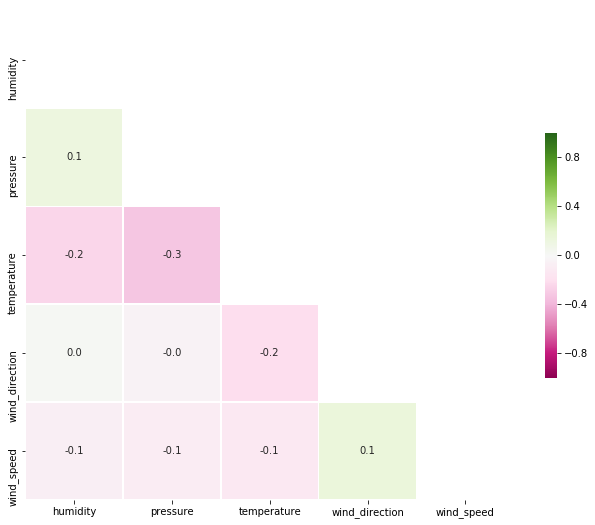

In [29]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot= True, fmt= '.1f',cmap='PiYG', vmin= -1, vmax=1,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});